In [284]:
import pandas as  pd


In [285]:
# Load your dataset (ensure the file path is correct)
df1 = pd.read_csv('data\\NIFTY 50-01-01-2021-to-01-01-2022.csv')
df2 = pd.read_csv('data\\NIFTY 50-02-01-2022-to-01-01-2023.csv')
df3 = pd.read_csv('data\\NIFTY 50-02-01-2023-to-01-01-2024.csv')
df4 = pd.read_csv('data\\NIFTY 50-02-01-2024-to-17-11-2024.csv')

# Preview the df
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Print the head and tail of the merged dfframe
print("Head of the merged dfframe:")
merged_df.head()




Head of the merged dfframe:


,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-JAN-2021,13996.10,14049.85,13991.35,14018.50,258090905.0,15873.75
1,04-JAN-2021,14104.35,14147.95,13953.75,14132.90,494999295.0,28705.09
2,05-JAN-2021,14075.15,14215.60,14048.15,14199.50,492475349.0,30872.87
3,06-JAN-2021,14240.95,14244.15,14039.90,14146.25,632323316.0,34615.55
4,07-JAN-2021,14253.75,14256.25,14123.10,14137.35,559173512.0,33446.47


In [286]:
print("\nTail of the merged dataframe:")
merged_df.tail()

df= merged_df.copy()


Tail of the merged dataframe:


Data preprocessing

In [287]:
print(df.isnull().sum())

# Optionally, fill missing values with forward filling or drop them
df.fillna(method='ffill', inplace=True)

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64


C:\Users\sadha\AppData\Local\Temp\ipykernel_16800\3642176079.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [288]:
df.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [289]:


# Set 'Date' as the index
#df.set_index('Date ', inplace=True)

# Show the cleaned data
df.head()
data = df.copy()

In [290]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-JAN-2021,13996.10,14049.85,13991.35,14018.50,258090905.0,15873.75
1,04-JAN-2021,14104.35,14147.95,13953.75,14132.90,494999295.0,28705.09
2,05-JAN-2021,14075.15,14215.60,14048.15,14199.50,492475349.0,30872.87
3,06-JAN-2021,14240.95,14244.15,14039.90,14146.25,632323316.0,34615.55
4,07-JAN-2021,14253.75,14256.25,14123.10,14137.35,559173512.0,33446.47


In [291]:
data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
956,08-NOV-2024,24207.70,24276.15,24066.65,24148.20,298725122.0,27670.30
957,11-NOV-2024,24087.25,24336.80,24004.60,24141.30,273370562.0,26600.28
958,12-NOV-2024,24225.80,24242.00,23839.15,23883.45,255825829.0,26852.73
959,13-NOV-2024,23822.45,23873.60,23509.60,23559.05,304569316.0,27765.81
960,14-NOV-2024,23542.15,23675.90,23484.15,23532.70,257708474.0,24814.37


In [292]:
data.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [293]:
data_copy= data.copy()

In [294]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Drop the 'Date' column as it's not numeric
data = data.drop('Date ', axis=1)

# Convert to a NumPy array
data_values = data.values  # Includes all numeric columns

# Normalize the entire dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)

# Create sequences for all columns
def create_sequences_all_columns(data, sequence_length=8):
    sequences = []
    labels = []
    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i, :])  # All columns as input
        labels.append(data[i, 3])  # The 'Close' column as the target (index 3)
    return np.array(sequences), np.array(labels)

# Generate sequences
sequence_length = 8  # Last 60 rows as input
X, y = create_sequences_all_columns(scaled_data, sequence_length)

# Ensure 3D shape for X: (num_samples, sequence_length, num_features)
# y will remain 1D for regression (predicting 'Close')
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split the data into training and testing sets (80-20 split)
train_size = int(len(X) * 0.85)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes for verification
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (810, 8, 6), y_train shape: (810,)
X_test shape: (143, 8, 6), y_test shape: (143,)


In [295]:
import tensorflow as tf

# Build the TCNN model with dilated convolutions
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 6), dilation_rate=1),  # No dilation for first layer
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', dilation_rate=4),  # Dilated convolution in second layer
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (next day's price)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
#model.summary()

c:\Sadhana\458\Module_7\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0704 - val_loss: 0.0015
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3870e-04 - val_loss: 9.1078e-04
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0045e-04 - val_loss: 8.9007e-04
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2699e-04 - val_loss: 0.0011
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3275e-04 - val_loss: 8.8308e-04
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0198e-04 - val_loss: 8.8633e-04
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9098e-04 - val_loss: 9.8525e-04


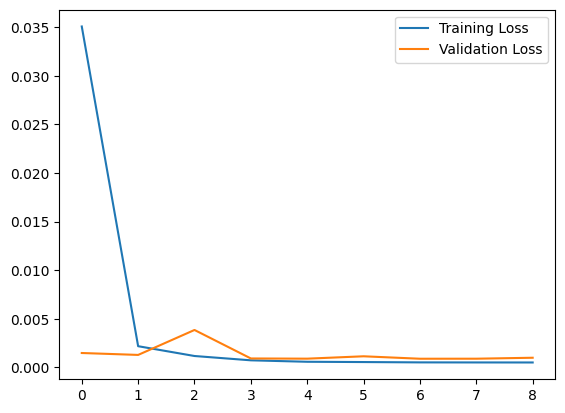

In [296]:
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


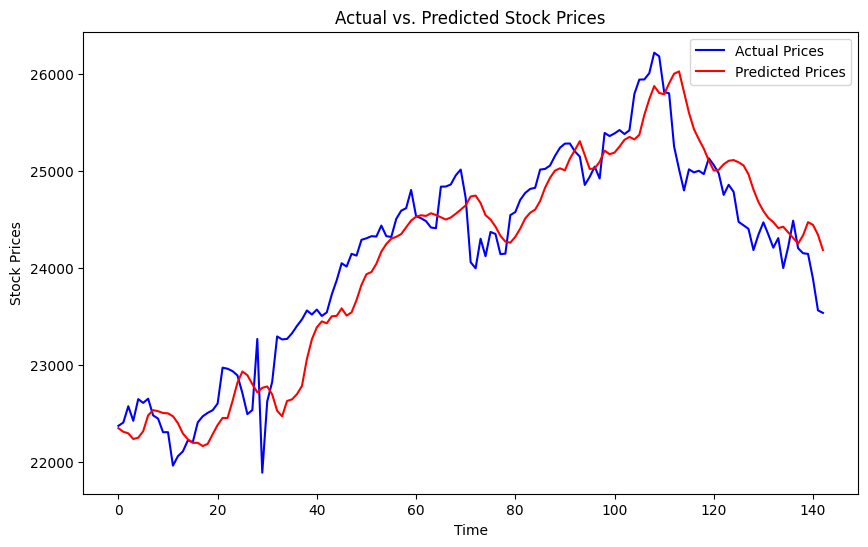

In [297]:
import matplotlib.pyplot as plt
import numpy as np

# Predict stock prices on the test set
predictions = model.predict(X_test)

# Create a placeholder array with the same shape as the original scaled data
# This is needed because `MinMaxScaler` works on the entire dataset structure
predictions_placeholder = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions_placeholder[:, 3] = predictions[:, 0]  # Place predictions in the 'Close' column (index 3)

# Inverse transform the predictions to the original scale
predictions_actual = scaler.inverse_transform(predictions_placeholder)[:, 3]  # Extract the 'Close' column

# Prepare the actual test labels (y_test) for inverse transformation
y_test_placeholder = np.zeros((y_test.shape[0], scaled_data.shape[1]))
y_test_placeholder[:, 3] = y_test  # Place actual test values in the 'Close' column (index 3)

# Inverse transform the actual values
y_test_actual = scaler.inverse_transform(y_test_placeholder)[:, 3]  # Extract the 'Close' column

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions_actual, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

